<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE2_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

1. Carga de datos:
- Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
- Asegúrate de que los datos no contengan valores nulos o atípicos.

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Archivos en la carpeta:", files)
path = os.path.join(path, files[1])
print("Path to dataset file:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2
Archivos en la carpeta: ['database.sqlite', 'Iris.csv']
Path to dataset file: /root/.cache/kagglehub/datasets/uciml/iris/versions/2/Iris.csv


In [5]:
# Cargar datos
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Verificar valores nulos
print("¿Hay valores nulos en el dataset?")
print(df.isnull().sum())


¿Hay valores nulos en el dataset?
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
# Calcular IQR para detectar outliers
Q1 = df.iloc[:, 1:-1].quantile(0.25)  # Primer cuartil
Q3 = df.iloc[:, 1:-1].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLímites inferiores y superiores para detectar valores atípicos:")
print("Límite inferior:\n", lower_bound)
print("Límite superior:\n", upper_bound)

# Verificar cuántos valores están fuera de los límites
outliers = ((df.iloc[:, 1:-1] < lower_bound) | (df.iloc[:, 1:-1] > upper_bound)).sum()
print("\nCantidad de valores atípicos por columna:")
print(outliers)



Límites inferiores y superiores para detectar valores atípicos:
Límite inferior:
 SepalLengthCm    3.15
SepalWidthCm     2.05
PetalLengthCm   -3.65
PetalWidthCm    -1.95
dtype: float64
Límite superior:
 SepalLengthCm     8.35
SepalWidthCm      4.05
PetalLengthCm    10.35
PetalWidthCm      4.05
dtype: float64

Cantidad de valores atípicos por columna:
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


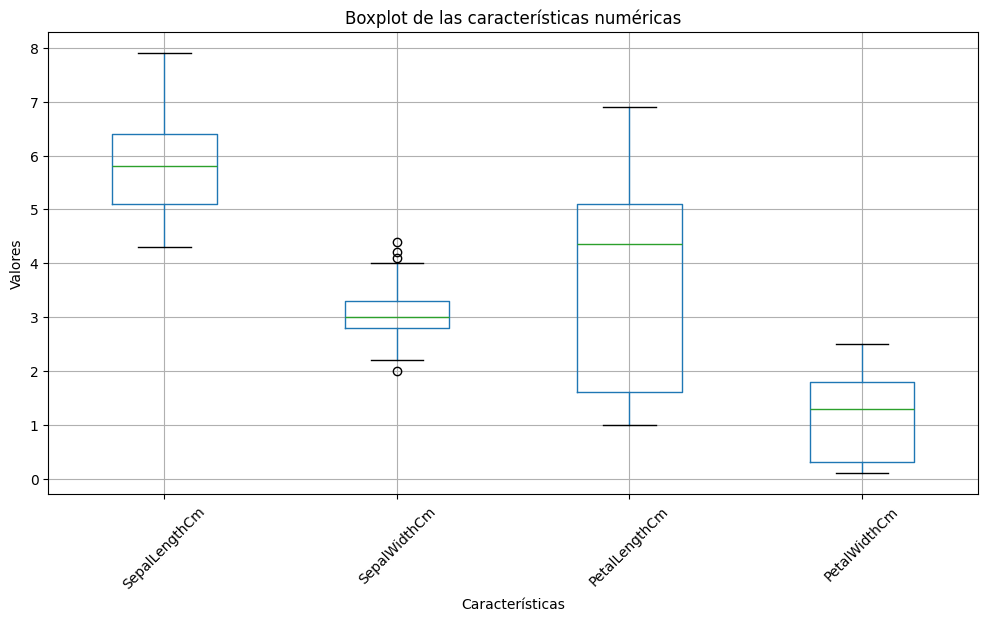

In [8]:
# Gráficos de caja para todas las columnas numéricas
plt.figure(figsize=(12, 6))
df.iloc[:, 1:-1].boxplot()
plt.title("Boxplot de las características numéricas")
plt.xlabel("Características")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Filtrar datos dentro de los límites
filtered_df = df[
    (df.iloc[:, 1] >= lower_bound['SepalLengthCm']) & (df.iloc[:, 1] <= upper_bound['SepalLengthCm']) &
    (df.iloc[:, 2] >= lower_bound['SepalWidthCm']) & (df.iloc[:, 2] <= upper_bound['SepalWidthCm']) &
    (df.iloc[:, 3] >= lower_bound['PetalLengthCm']) & (df.iloc[:, 3] <= upper_bound['PetalLengthCm']) &
    (df.iloc[:, 4] >= lower_bound['PetalWidthCm']) & (df.iloc[:, 4] <= upper_bound['PetalWidthCm'])
]

print("\nTamaño del dataset original:", df.shape)
print("Tamaño del dataset después de eliminar valores atípicos:", filtered_df.shape)



Tamaño del dataset original: (150, 6)
Tamaño del dataset después de eliminar valores atípicos: (146, 6)


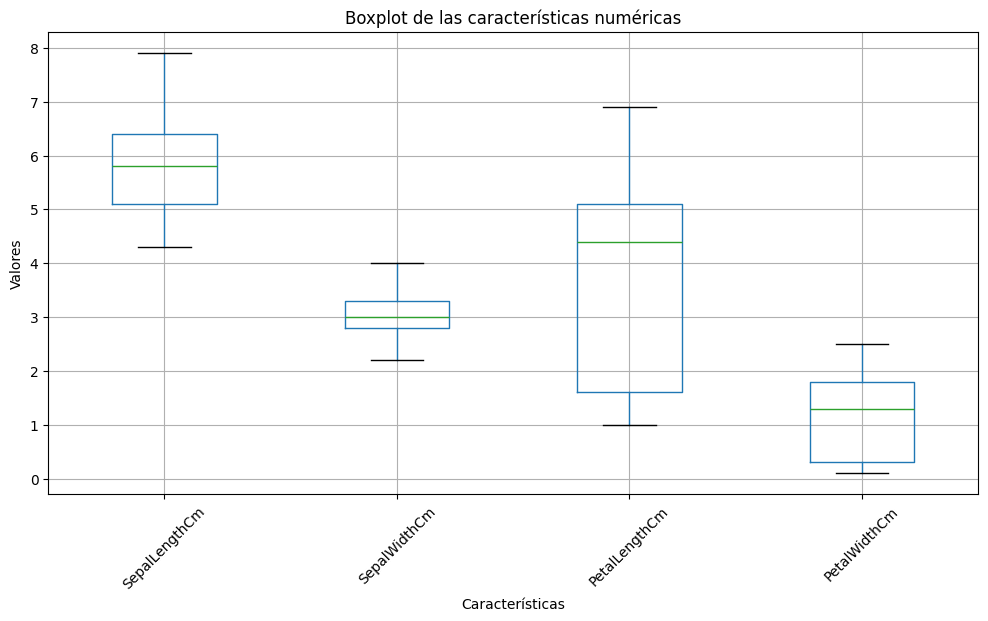

In [11]:
# Gráficos de caja para todas las columnas numéricas
plt.figure(figsize=(12, 6))
filtered_df.iloc[:, 1:-1].boxplot()
plt.title("Boxplot de las características numéricas")
plt.xlabel("Características")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

2. Exploración y preprocesamiento de datos:
- Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
- Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

In [12]:
from sklearn.preprocessing import StandardScaler

# Separar características numéricas (excluyendo la columna 'Id' y 'Species')
features = df.iloc[:, 1:-1]

# Normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un DataFrame con los datos normalizados
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

print("\nDatos normalizados (primeras filas):")
print(features_scaled_df.head())



Datos normalizados (primeras filas):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


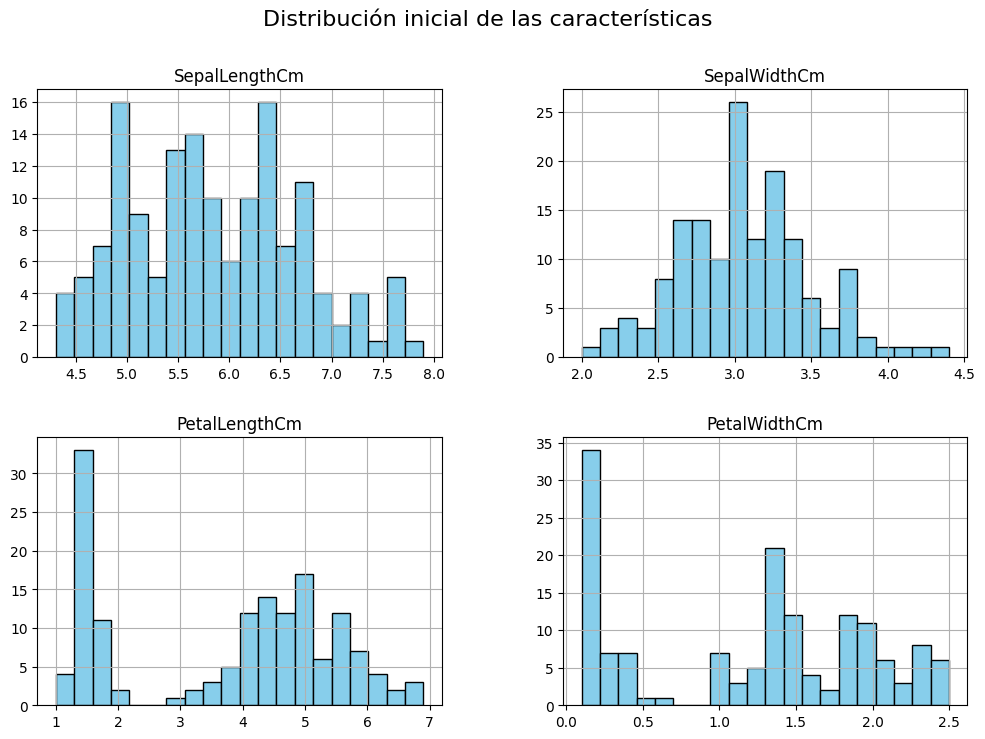

In [13]:
# Crear histogramas para las características originales
features.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribución inicial de las características", fontsize=16)
plt.show()


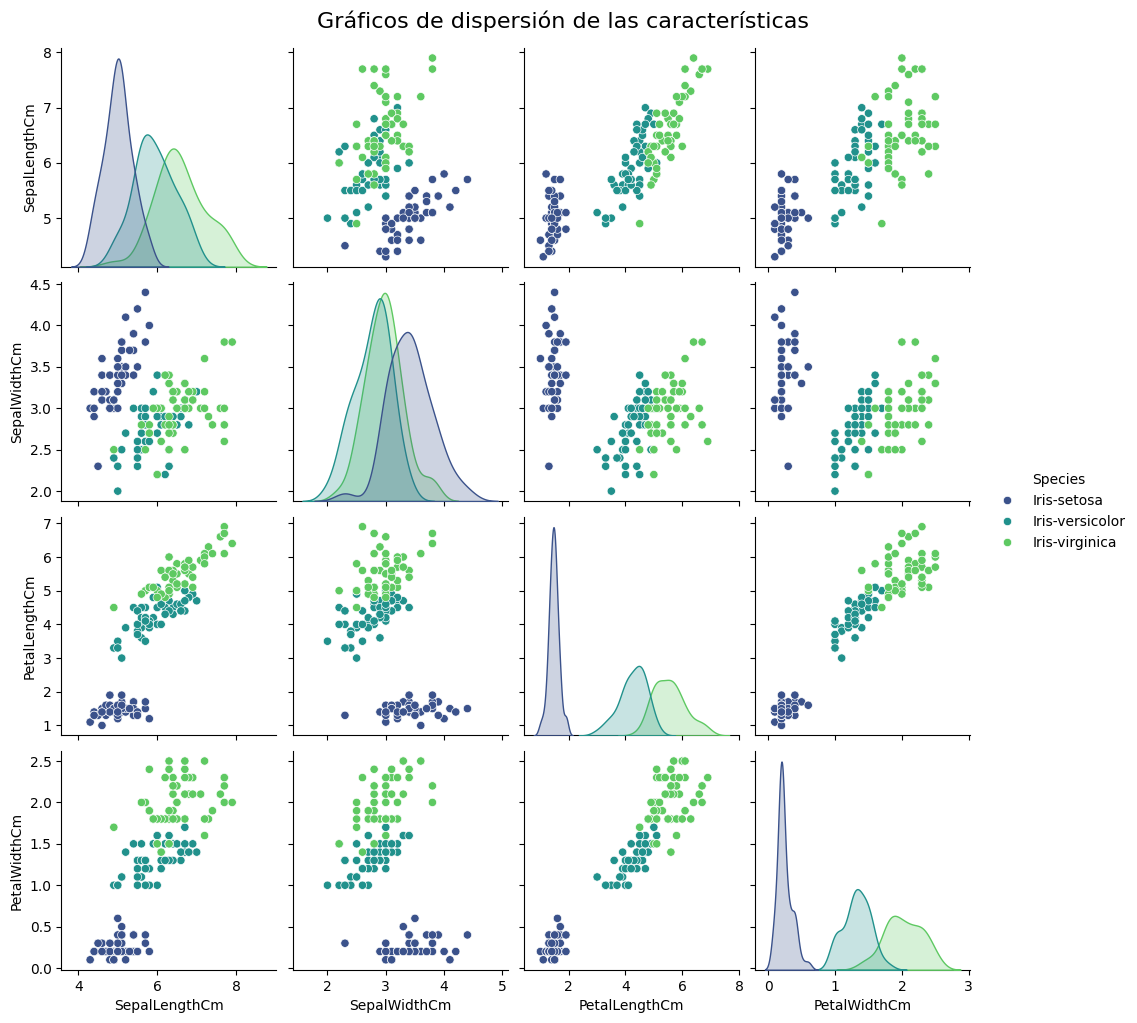

In [14]:
# Crear gráficos de dispersión entre pares de variables
import seaborn as sns

# Agregar las etiquetas de especie a las características originales
features_with_species = pd.concat([features, df['Species']], axis=1)

# Pares de gráficos para explorar relaciones
sns.pairplot(features_with_species, hue='Species', diag_kind='kde', palette='viridis')
plt.suptitle("Gráficos de dispersión de las características", y=1.02, fontsize=16)
plt.show()


3. Aplicación de PCA:
- Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
- Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

In [15]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Crear un DataFrame con los dos componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("\nPrimeras filas del DataFrame de componentes principales:")
print(pca_df.head())

# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("\nVarianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.2%}")

print(f"\nVarianza acumulada con los dos primeros componentes: {cumulative_variance[-1]:.2%}")



Primeras filas del DataFrame de componentes principales:
        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767

Varianza explicada por cada componente:
Componente 1: 72.77%
Componente 2: 23.03%

Varianza acumulada con los dos primeros componentes: 95.80%


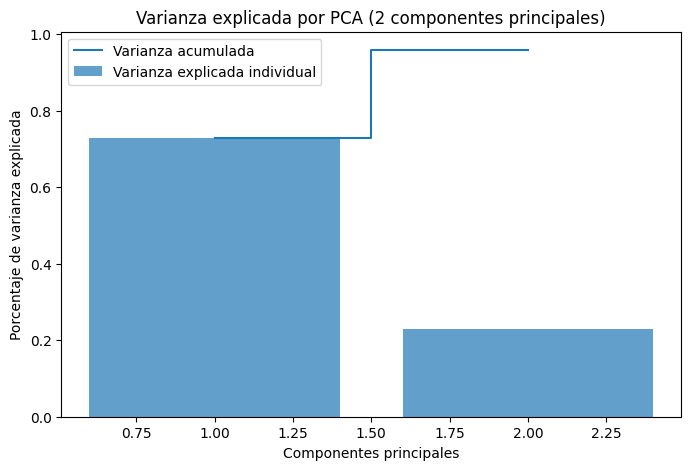

In [16]:
import matplotlib.pyplot as plt

# Gráfico de varianza explicada
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), explained_variance, alpha=0.7, align='center', label='Varianza explicada individual')
plt.step(range(1, 3), cumulative_variance, where='mid', label='Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por PCA (2 componentes principales)')
plt.legend(loc='best')
plt.show()


4. Visualización de los componentes principales:
- Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
- Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

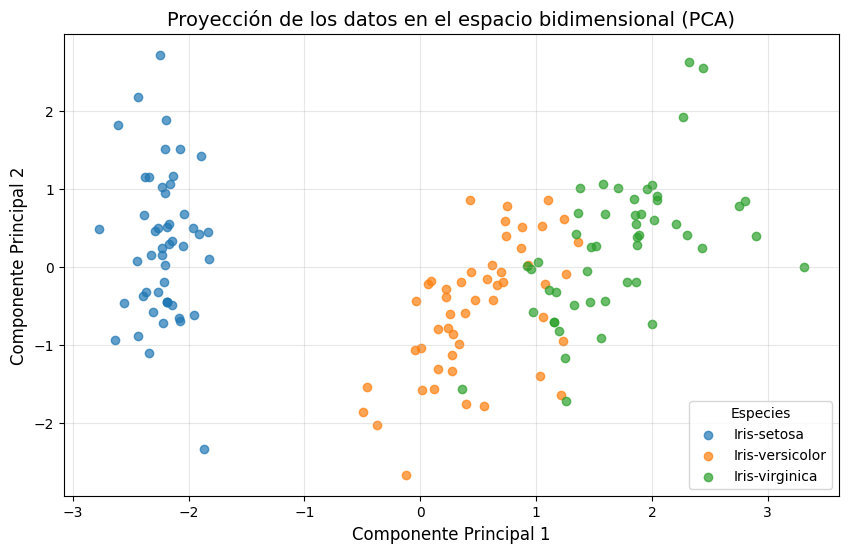

In [17]:
import matplotlib.pyplot as plt

# Agregar las etiquetas de las especies al DataFrame de los componentes principales
pca_df['Species'] = df['Species']

# Visualización del espacio bidimensional
plt.figure(figsize=(10, 6))
for species in pca_df['Species'].unique():
    subset = pca_df[pca_df['Species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species, alpha=0.7)

# Configurar el gráfico
plt.title('Proyección de los datos en el espacio bidimensional (PCA)', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Especies', fontsize=10)
plt.grid(alpha=0.3)
plt.show()
